# **Space X  Falcon 9 First Stage Landing Prediction**


## Predictive Analysis Using Machine Learning

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


## Objectives


To Perform exploratory  Data Analysis and determine Training Labels
*   create a column for the class
*   Standardize the data
*   Split into training data and test data

To find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


Importing the required libraries:

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

To plot the confusion matrix using the heatmap function from the seaborn library, we define a user defined function as follows:

In [2]:
def plot_confusion_matrix(y,y_predict, t='Confusion Matrix'):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='mako').set_title(t, fontsize=15) #annot=True to annotate cells
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=12)
    ax.set_ylabel('True labels', fontsize=12)
    # ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

Loading the data
<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv">dataset_part_2.csv</a>

This dataset will contain the target variable <code>Class</code> of the landing which will indicate if the landing was successful or not and hence will help to determine if the rocket will land or not. It will also be used to predict the total cost of mission as the total cost highly depends on whether the stage 1 landing was succesfull or not.


In [3]:
data= pd.read_csv("datasets/dataset_part_2.csv")
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


Loading dataset <a href='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'> dataset_part_3.csv</a>.

This dataset contains the  <code>predictor variables/features for the target variable 'Class'</code>

In [4]:
X= pd.read_csv("datasets/dataset_part_3.csv")
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## TASK DESCRIPTION:
For the problem of determining whether the rocket will land or not, we will use the data from the previous tasks to create a machine learning models to predict if the first stage will land or not. The data(predictor and target variables) is in the file <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv">dataset_part_2.csv</a> and <a href='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'> dataset_part_3.csv</a>. 

The data has been preprocessed and the missing values have been removed. The data has been standardized and the categorical variables have been converted to numerical variables. 

The data has been split into training and test data. The training data has been split into training and validation data. The data has been split into features and labels. The features are the data that will be used to predict the labels. The labels are the data that we want to predict. The labels are in the column labeled "class". The features are all the other columns.

We will use the training data to train the machine learning models. 
For the problem statement we will use the maiclassification models such as logistic regression, SVM, Decision Trees, and KNN
Uisng GridSearchCV, we will use the validation data to determine the best hyperparameters for the machine learning models.
We use  <code>10 fold cross validation</code>  to determine the best hyperparameters.

We will also plot the confusion matrices for each of the model. 

We will use the test data to determine which machine learning model performs the best, then compile the results.



### TASK  1
Creating a NumPy array from the column <code>Class</code> in <code>data</code>, by using <code>to_numpy()</code> method and making sure the output is a  Pandas series (only one bracket df\['name of  column']).


We need to predict if the stage 1 landed or not, so we need to predict the class. 0 denotes unsuccessful landing and 1 denotes successful landing.
So we choose Class variable as the target binary variable.

In [5]:
Y= data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
type(Y)

numpy.ndarray

## TASK  2


Standardizing the data in <code>X</code> using StandardScalar()

Note that we wont standardize <code>Y</code> as it is a class denoting discrete binary variable and not a continuous variable.

In [7]:
transform = preprocessing.StandardScaler()

In [8]:
X = transform.fit(X).transform(X.astype(float))
X

array([[-1.71291154,  0.        , -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.18972425, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.15742336, -0.65391284, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  2.01380177,  3.49060516, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  2.01380177,  1.00389436, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154, -0.51905572, -0.65391284, ..., -0.21566555,
        -0.18569534,  9.43398113]])

## TASK  3


Now, we are splitting the data into training and testing data using the <code>train_test_split</code> function. <br> The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are tuned using <code>GridSearchCV</code>.
<br> For splitting the data X and Y into training and test data, we choose the test_size to 20% of the total data and random_state to 2.

The variables are: <code>X_train, X_test, Y_train, Y_test</code>


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Checking the no of samples in test set. The test set should be 20% of the total data. **0.2 *x* 90= 18**.


In [10]:
Y_test.shape

(18,)

## TASK  4


We fir a logistic regression model by then creating a GridSearchCV object <code>lr_cv</code> with cv = 10.  
Then Fit the object to find the best parameters from the given <code>parameters</code> dictionary .


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lcr = LogisticRegression()

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv= GridSearchCV(lr,parameters, cv=10)
lr_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [13]:
print("Tuned hyperparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)
# print(lr_cv.best_params_)
# print(lr_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


## TASK  5


We now calculate the accuracy on the test data using the <code>score</code> method:


In [14]:
# lr=LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')
# lr.fit(X_train,Y_train)
lrts= lr_cv.score(X_test,Y_test)
lrts

0.8333333333333334

Plotting the confusion matrix:


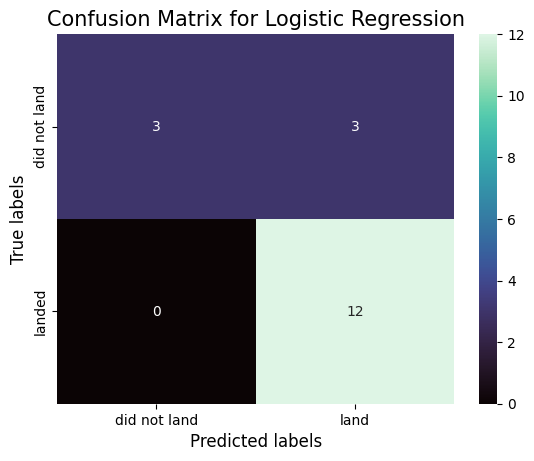

In [15]:
yhat=lr_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, 'Confusion Matrix for Logistic Regression')

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Fitting a Support Vector Machine by using <code>GridSearchCV</code> hyperparameter tuning with cv=10.  


In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv= GridSearchCV(svm,parameters, cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [35]:
print("Tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


## TASK  7


Calculate the accuracy on the test data:


In [19]:
svmts= svm_cv.score(X_test,Y_test)
svmts

0.8333333333333334

Plotting the confusion matrix


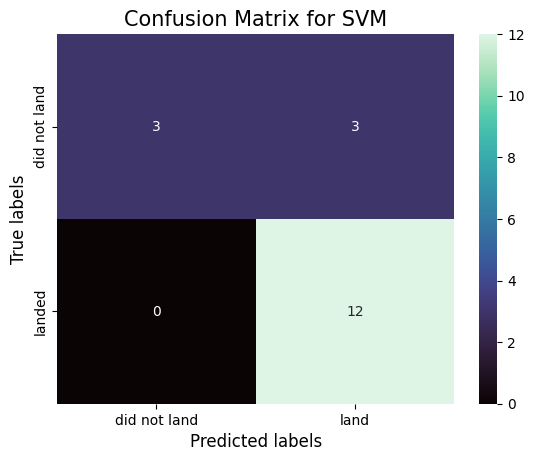

In [20]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, 'Confusion Matrix for SVM')

## TASK  8


Training a decision tree classifier using <code>GridSearchCV</code> hyperparameter tuning with cv = 10.

In [21]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [22]:
tree_cv= GridSearchCV(tree,parameters, cv=10)
tree_cv.fit(X_train,Y_train)

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("Tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8732142857142857


## TASK  9


Calculating the accuracy of tree_cv on the test data:


In [24]:
dtts= tree_cv.score(X_test,Y_test)
dtts

0.8888888888888888

Plotting the confusion matrix:


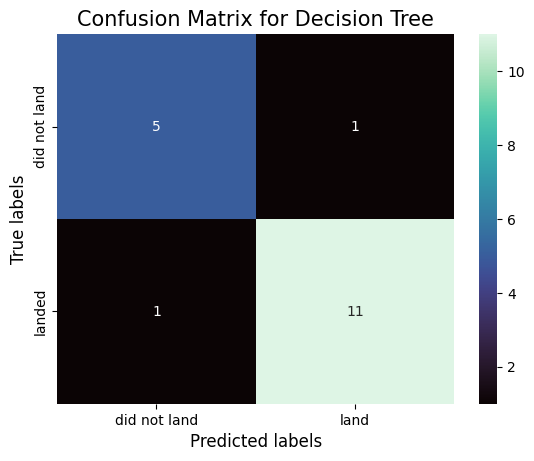

In [25]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, 'Confusion Matrix for Decision Tree')

## TASK  10


Training a KNN classifier and tuning the parameters:

In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [27]:
knn_cv= GridSearchCV(KNN,parameters, cv=10)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


In [29]:
nn= knn_cv.best_params_['n_neighbors']

## TASK  11


Calculating the accuracy of knn_cv on the test data:


In [30]:
knnts= knn_cv.score(X_test,Y_test)
knnts

0.7777777777777778

Plotting the confusion matrix:


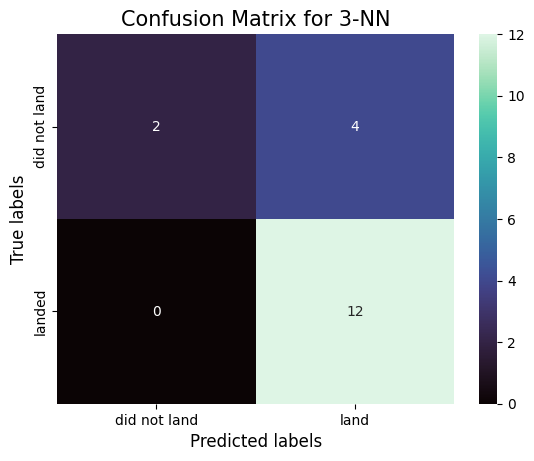

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat, f'Confusion Matrix for {nn}-NN')

## TASK  12


Finding which method performs best:


In [32]:
lrs= lr_cv.best_score_
svms= svm_cv.best_score_
dts= tree_cv.best_score_
knns= knn_cv.best_score_
# acc_sc={'LogisticRegression':lrs,'SVM':svms,'Decision Tree':dts,'KNN':knns}
scdf = pd.DataFrame([[lrs, lrts],[svms, svmts],[dts, dtts],[knns, knnts]], columns=['Accuracy', 'Test Accuracy'], index=[
                    'LogisticRegression', 'SVM', 'DecisionTree', f'{nn}-NN'])
scdf

,Accuracy,Test Accuracy
LogisticRegression,0.821429,0.833333
SVM,0.848214,0.833333
DecisionTree,0.873214,0.888889
3-NN,0.833929,0.777778


Plotting a bar chart for the scores of the models:

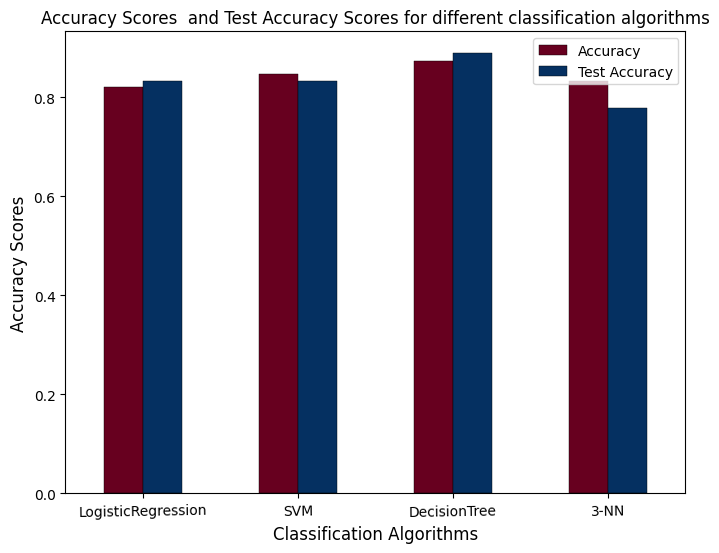

In [33]:
scdf.plot(kind='bar', figsize=(8,6), rot=1, edgecolor='black', linewidth=0.3, cmap='RdBu')
plt.title('Accuracy Scores  and Test Accuracy Scores for different classification algorithms')
plt.xlabel('Classification Algorithms', fontsize=12)
plt.ylabel('Accuracy Scores', fontsize=12)
plt.show()

Finding the best classification model:

In [34]:
mean_acc=(scdf['Accuracy']+scdf['Test Accuracy'])/2
mean_acc= mean_acc.to_frame()
mean_acc.reset_index(inplace=True)
mean_acc.columns = ['Model', 'Mean Accuracy']

best_model= mean_acc[mean_acc['Mean Accuracy']== mean_acc['Mean Accuracy'].max()]['Model']
best_model= best_model.to_string(index=False)
print(f"The best classification model is {best_model}, with a mean accuracy of {mean_acc['Mean Accuracy'].max()}")
print(f"The best parameters for the Decision Tree model are:\n {tree_cv.best_params_}")

The best classification model is DecisionTree, with a mean accuracy of 0.8810515873015873
The best parameters for the Decision Tree model are:
 {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


# Observations:
* The models had almost the same accuracy fot the test data
* The best model is the Decision tree, having approximately 87.5% accuracy
* The worst model is the KNN, having approximately 80% accuracy